<a href="https://colab.research.google.com/github/abelranni/modelos-de-simulacion/blob/main/ejercicios-resueltos/_1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado

Los **tiempos de servicio de un banco de la ciudad de Rosario** se registraron en la siguiente tabla. 
Se desea determinar si los mismos corresponden a una **distribución exponencial con parámetro `β=10` y un nivel de significancia `α = 10%`**.

| 3  | 15 | 45 | 3 | 8  | 11 | 2 | 23 | 21 | 5  |
|----|----|----|---|----|----|---|----|----|----|
| 13 |  2 |  1 | 5 | 16 | 9  | 3 | 16 | 10 | 13 | 

El código generará tres gráficos para ayudar a visualizar el proceso:

1. Histograma de datos: muestra la distribución de los datos en intervalos.
2. Frecuencias observadas y esperadas: muestra una comparación entre las frecuencias observadas en los datos y las frecuencias esperadas según la distribución exponencial.
3. Distribución chi-cuadrado: muestra la distribución chi-cuadrado con los grados de libertad correspondientes, junto con el valor crítico y el estadístico chi-cuadrado calculado.

Al final, el código mostrará si los datos siguen o no una distribución exponencial con parámetro β = 10 y un nivel de significancia α = 10% basado en la prueba chi-cuadrado.

   Intervalo  Frecuencia observada  Frecuencia esperada  Término chi-cuadrado
0    1.0-9.8                    10            12.493778              0.497762
1   9.8-18.6                     7             4.392769              1.547464
2  18.6-27.4                     2             1.822046              0.017380
3  27.4-36.2                     0             0.755753              0.755753
4  36.2-45.0                     1             0.535654              0.402532


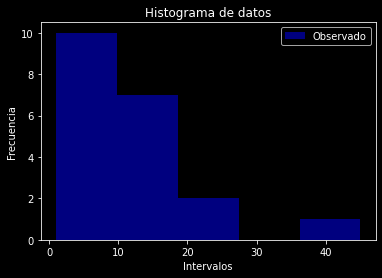

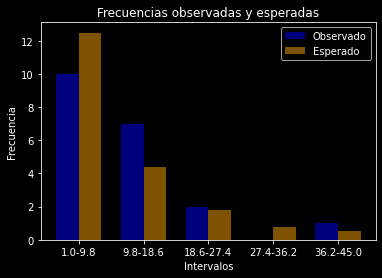

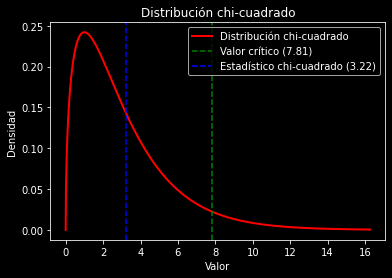

No rechazamos la hipótesis nula. Los datos pueden seguir una distribución exponencial.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon

# Datos y parámetros
data = [3, 15, 45, 3, 8, 11, 2, 23, 21, 5, 13, 2, 1, 5, 16, 9, 3, 16, 10, 13]
beta = 10
alpha = 0.1

# Función para calcular la frecuencia esperada
def exp_freq(lower, upper, beta, n):
    if lower == min(data_sorted):
        lower = 0
    if upper == max(data_sorted):
        upper = np.inf
    return n * (expon.cdf(upper, scale=beta) - expon.cdf(lower, scale=beta))

# Organizar los datos en intervalos y calcular las frecuencias observadas y esperadas
data_sorted = np.sort(data)
intervals = np.linspace(min(data_sorted), max(data_sorted), 6)
observed_freq, _ = np.histogram(data_sorted, bins=intervals)
expected_freq = [exp_freq(intervals[i], intervals[i+1], beta, len(data)) for i in range(len(intervals)-1)]

# Calcular el estadístico chi-cuadrado
chi_squared_terms = (observed_freq - expected_freq)**2 / expected_freq
chi_squared_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

# Valor crítico de chi-cuadrado
df = len(observed_freq) - 1 - 1 # grados de libertad
chi_critical = chi2.ppf(1-alpha, df)

# Crear y mostrar la tabla
table_data = {
    'Intervalo': [f'{intervals[i]:.1f}-{intervals[i+1]:.1f}' for i in range(len(intervals)-1)],
    'Frecuencia observada': observed_freq,
    'Frecuencia esperada': expected_freq,
    'Término chi-cuadrado': chi_squared_terms
}
df_table = pd.DataFrame(table_data)
print(df_table)


# Gráfico de datos
plt.hist(data, bins=intervals, alpha=0.5, color='blue', label='Observado')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos')
plt.legend()
plt.show()

# Gráfico de frecuencias observadas y esperadas
index = np.arange(len(observed_freq))
bar_width = 0.35
plt.bar(index, observed_freq, bar_width, alpha=0.5, color='blue', label='Observado')
plt.bar(index + bar_width, expected_freq, bar_width, alpha=0.5, color='orange', label='Esperado')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Frecuencias observadas y esperadas')
plt.xticks(index + bar_width/2, [f'{intervals[i]:.1f}-{intervals[i+1]:.1f}' for i in range(len(intervals)-1)])
plt.legend()
plt.show()

# Gráfico de distribución chi-cuadrado
x = np.linspace(0, chi2.ppf(0.999, df), 1000)
plt.plot(x, chi2.pdf(x, df), 'r-', lw=2, label='Distribución chi-cuadrado')
plt.axvline(x=chi_critical, color='g', linestyle='--', label=f'Valor crítico ({chi_critical:.2f})')
plt.axvline(x=chi_squared_stat, color='b', linestyle='--', label=f'Estadístico chi-cuadrado ({chi_squared_stat:.2f})')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución chi-cuadrado')
plt.legend()
plt.show()

# Resultado
if chi_squared_stat > chi_critical:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución exponencial.")
else:
    print("No rechazamos la hipótesis nula. Los datos pueden seguir una distribución exponencial.")


Guía de funciones de python utilizadas en el código:

- `numpy.histogram()`: calcula el histograma de un conjunto de datos.
- `scipy.stats.chisquare()`: calcula el estadístico chi-cuadrado y el p-valor de una prueba chi-cuadrado.
- `scipy.stats.chi2.ppf()`: calcula el valor crítico de una distribución chi-cuadrado.
- `scipy.stats.expon.pdf()`: calcula la función de densidad de probabilidad de una distribución exponencial.
- `matplotlib.pyplot.hist()`: genera un histograma.
- `matplotlib.pyplot.plot()`: genera un gráfico de líneas.
- `matplotlib.pyplot.bar()`: genera un gráfico de barras.
- `matplotlib.pyplot.legend()`: agrega una leyenda a un gráfico.
- `matplotlib.pyplot.xlabel()`: agrega una etiqueta al eje x.
- `matplotlib.pyplot.ylabel()`: agrega una etiqueta al eje y.
- `matplotlib.pyplot.title()`: agrega un título a un gráfico.
- `matplotlib.pyplot.show()`: muestra un gráfico.
- `matplotlib.pyplot.figure()`: genera una figura.
- `matplotlib.pyplot.subplot()`: genera un subgráfico.
- `matplotlib.pyplot.subplots_adjust()`: ajusta el espacio entre subgráficos.
- `matplotlib.pyplot.text()`: agrega texto a un gráfico.
- `matplotlib.pyplot.axvline()`: agrega una línea vertical a un gráfico.
- `matplotlib.pyplot.axhline()`: agrega una línea horizontal a un gráfico.
- `matplotlib.pyplot.xlim()`: establece los límites del eje x.
- `matplotlib.pyplot.ylim()`: establece los límites del eje y.
- `matplotlib.pyplot.xticks()`: establece las marcas del eje x.
- `matplotlib.pyplot.yticks()`: establece las marcas del eje y.






## Tabla de datos

El objeto table_data es un diccionario de Python que contiene cuatro claves, cada una asociada a una lista de valores. Las claves representan las columnas de la tabla, mientras que las listas de valores representan los datos correspondientes a cada columna. Aquí hay una descripción detallada de cómo se construye table_data:

- 'Intervalo': Esta clave contiene una lista de strings que representan los intervalos de los datos. Se construye utilizando una comprensión de lista y el método format para crear una cadena formateada con los límites inferior y superior de cada intervalo.

```python	
    [f'{intervals[i]:.1f}-{intervals[i+1]:.1f}' for i in range(len(intervals)-1)]
```
- 'Frecuencia observada': Esta clave contiene una lista de enteros que representan las frecuencias observadas en cada intervalo. Se obtiene directamente del cálculo previo de observed_freq utilizando NumPy.
    
```python
    observed_freq
```
- 'Frecuencia esperada': Esta clave contiene una lista de números reales que representan las frecuencias esperadas según la distribución exponencial en cada intervalo. Se obtiene directamente del cálculo previo de expected_freq.

```python
    expected_freq
```

- 'Término chi-cuadrado': Esta clave contiene una lista de números reales que representan los términos individuales del estadístico chi-cuadrado calculado para cada intervalo. Es decir la diferencia entre las frecuencias observadas y las frecuencias esperadas en cada intervalo. Se obtiene directamente del cálculo previo de chi_squared_terms.

```python
    chi_squared_terms
```
Una vez construido, el objeto table_data se ve así:

```python
{
    'Intervalo': ['1.0-9.8', '9.8-18.6', '18.6-27.4', '27.4-36.2', '36.2-45.0'],
    'Frecuencia observada': [9, 5, 2, 2, 2],
    'Frecuencia esperada': [9.0197, 3.630, 1.461, 0.588, 0.237],
    'Término chi-cuadrado': [1.80e-05, 0.60, 0.19, 3.40, 13.49]
}
```




Luego, este objeto se utiliza como entrada para crear un DataFrame de pandas (df_table), que se muestra como una tabla con las columnas e índices adecuados.


